In [1]:
import sys
sys.path.append('..')

In [2]:
from src import *

In [3]:
face_images = get_images_from_folder('synth-faces')
cat_images  = get_images_from_folder('cats')

In [4]:
face_sampler = ImageSampleGenerator(images = face_images, sample_size=16)
cat_sampler  = ImageSampleGenerator(images = cat_images,  sample_size=16)

In [5]:
face_matcher = PatternMatcher(16, face_sampler)
cat_matcher  = PatternMatcher(16, cat_sampler)

In [6]:
#TODO: Update the updater to return a value 0-1.
def face_updater(a, b, examples_seen, learning_rate='auto'):
    if learning_rate == 'auto': average_amount = 1 / (examples_seen+1)
    else: average_amount = learning_rate

    sim_score = 1-cat_matcher.comparison_fn(b, cat_matcher.patterns[cat_matcher.get_most_similar(b)])
    sim_score *= average_amount

    return (a * (1-sim_score)) + (b * sim_score)

In [7]:
def cat_updater(a, b, examples_seen, learning_rate='auto'):
    if learning_rate == 'auto': average_amount = 1 / (examples_seen+1)
    else: average_amount = learning_rate

    sim_score = 1-face_matcher.comparison_fn(b, face_matcher.patterns[face_matcher.get_most_similar(b)])
    sim_score *= (average_amount+(1-average_amount)*.9)

    return (a * (1-sim_score)) + (b * sim_score)

In [8]:
face_matcher.update_fn = face_updater
cat_matcher.update_fn  = cat_updater

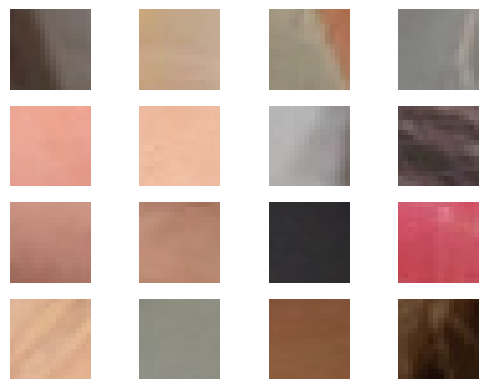

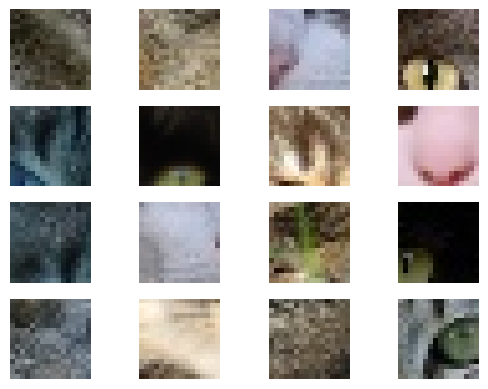

In [9]:
plot_image_grid(face_matcher.patterns)
plot_image_grid(cat_matcher.patterns)

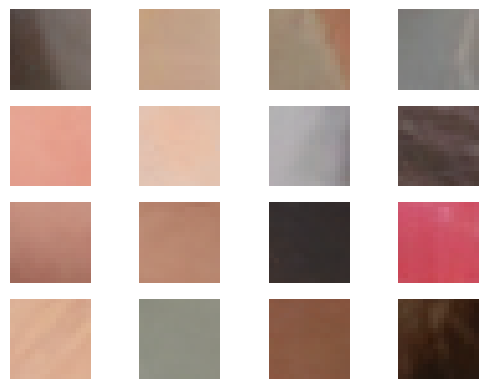

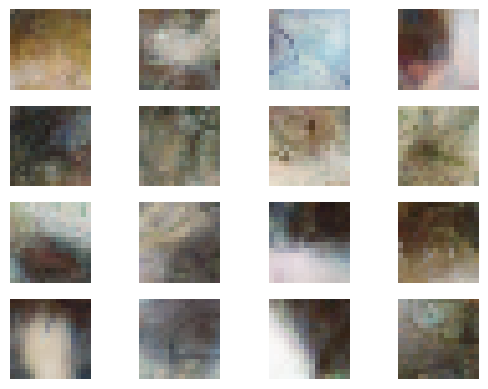

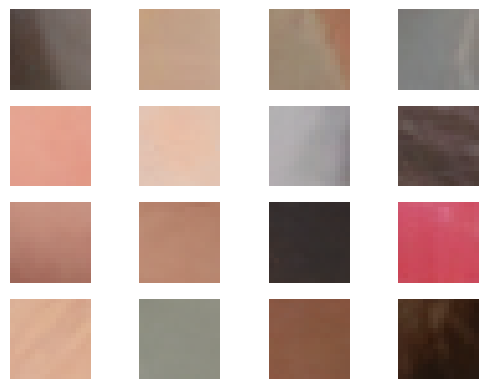

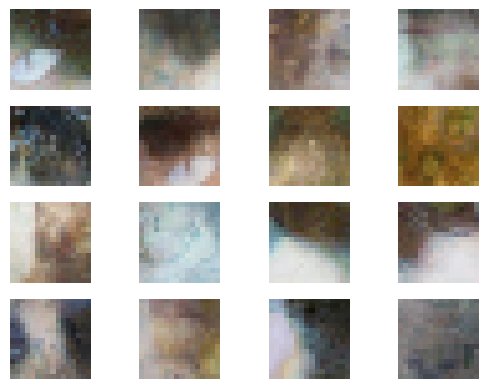

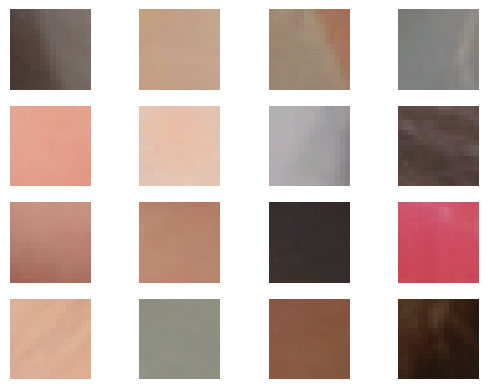

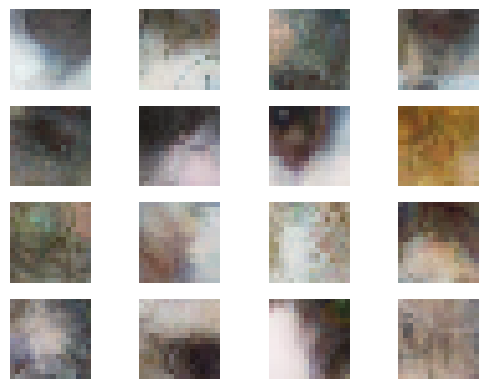

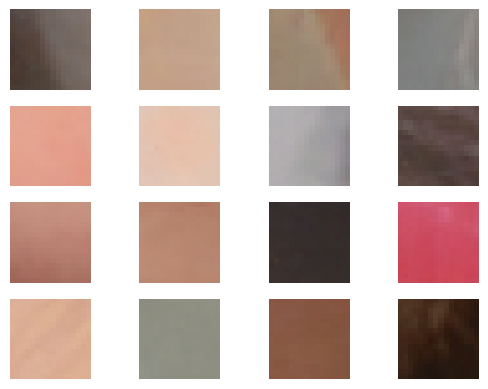

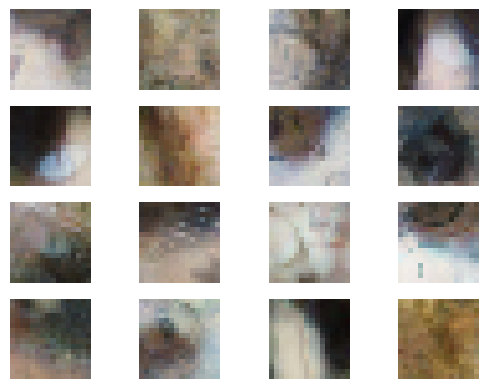

In [10]:
# Train the face and cat matcher together

for i in range(4):
    for j in range(4000):
        face_matcher.train_sample()
        cat_matcher.train_sample()
    plot_image_grid(face_matcher.patterns)
    plot_image_grid(cat_matcher.patterns)

In [11]:
# Test the pattern matchers against each other
# This test takes an estimate of 16 minutes to run with the current activation mapping algorithm

for i in range(20):
    cat_image  = random.choice(cat_images)

    cat_maxes  = np.max(cat_matcher.get_activation_map(cat_image),  axis = -1)
    face_maxes = np.max(face_matcher.get_activation_map(cat_image), axis = -1)

    cat_score  = np.sum(np.greater(cat_maxes, face_maxes))
    face_score = np.sum(np.greater(face_maxes, cat_maxes))

    print(f'For cat image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {cat_score > face_score}')

    face_image = random.choice(face_images)

    cat_maxes  = np.max(cat_matcher.get_activation_map(face_image),  axis = -1)
    face_maxes = np.max(face_matcher.get_activation_map(face_image), axis = -1)

    cat_score  = np.sum(np.greater(cat_maxes, face_maxes))
    face_score = np.sum(np.greater(face_maxes, cat_maxes))

    print(f'For face image: cat score = {cat_score}, face score = {face_score}, predicted: {'cat' if cat_score > face_score else 'face'} by a margin of {abs(cat_score - face_score)}, correct: {face_score > cat_score}')

    

For cat image: cat score = 293, face score = 491, predicted: face by a margin of 198, correct: False


KeyboardInterrupt: 